In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
churn_data = pd.read_csv('Churn_Modelling.csv')

In [11]:
churn_data.head()

,RowNum,CustId,Surname,CreditScore,Geo,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActive,EstimatedSal,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2.0,125510.82,1,1,1,79084.10,0


In [12]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RowNum         10002 non-null  int64  
 1   CustId         10002 non-null  int64  
 2   Surname        10002 non-null  object 
 3   CreditScore    10002 non-null  int64  
 4   Geo            10002 non-null  object 
 5   Gender         10002 non-null  object 
 6   Age            9999 non-null   float64
 7   Tenure         10000 non-null  float64
 8   Balance        10002 non-null  float64
 9   NumOfProducts  10002 non-null  int64  
 10  HasCrCard      10002 non-null  int64  
 11  IsActive       10002 non-null  int64  
 12  EstimatedSal   10002 non-null  float64
 13  Exited         10002 non-null  int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 1.1+ MB


In [14]:
missing_values = churn_data.isnull().sum()
missing_values

RowNum           0
CustId           0
Surname          0
CreditScore      0
Geo              0
Gender           0
Age              3
Tenure           2
Balance          0
NumOfProducts    0
HasCrCard        0
IsActive         0
EstimatedSal     0
Exited           0
dtype: int64

In [15]:
churn_data['Age'].fillna(churn_data['Age'].median(), inplace=True)

In [16]:
churn_data['Tenure'].fillna(churn_data['Tenure'].median(), inplace=True)

In [17]:
churn_data.isnull().sum()

RowNum           0
CustId           0
Surname          0
CreditScore      0
Geo              0
Gender           0
Age              0
Tenure           0
Balance          0
NumOfProducts    0
HasCrCard        0
IsActive         0
EstimatedSal     0
Exited           0
dtype: int64

In [20]:
duplicate_rows = churn_data.duplicated()
duplicate_rows

0        False
1        False
2        False
3        False
4        False
         ...  
9997     False
9998     False
9999     False
10000    False
10001    False
Length: 10002, dtype: bool

In [24]:
duplicate_rows.sum()

0

In [25]:
churn_data.drop(['RowNum', 'CustId', 'Surname'], axis=1, inplace=True)


In [26]:
churn_data.head()


,CreditScore,Geo,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActive,EstimatedSal,Exited
0,619,France,Female,42.0,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2.0,125510.82,1,1,1,79084.10,0


In [27]:
renamed_columns = {
    'Geo': 'Geography',
    'HasCrCard': 'HasCreditCard',
    'IsActive': 'IsActiveMember',
    'EstimatedSal': 'EstimatedSalary'
}
churn_data.rename(columns=renamed_columns, inplace=True)


In [28]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2.0,125510.82,1,1,1,79084.10,0


In [29]:
churn_data.to_csv('churn_datasaved.csv')

In [30]:
churn_data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,9999.000000,10000.000000,10002.000000,10002.000000,10002.000000,10002.000000,10002.000000,10002.000000
mean,650.554989,38.922792,5.012800,76483.606846,1.530194,0.705559,0.514997,100083.669289,0.203659
std,96.661490,10.487146,2.892174,62398.160146,0.581639,0.455814,0.499800,57508.085436,0.402739
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


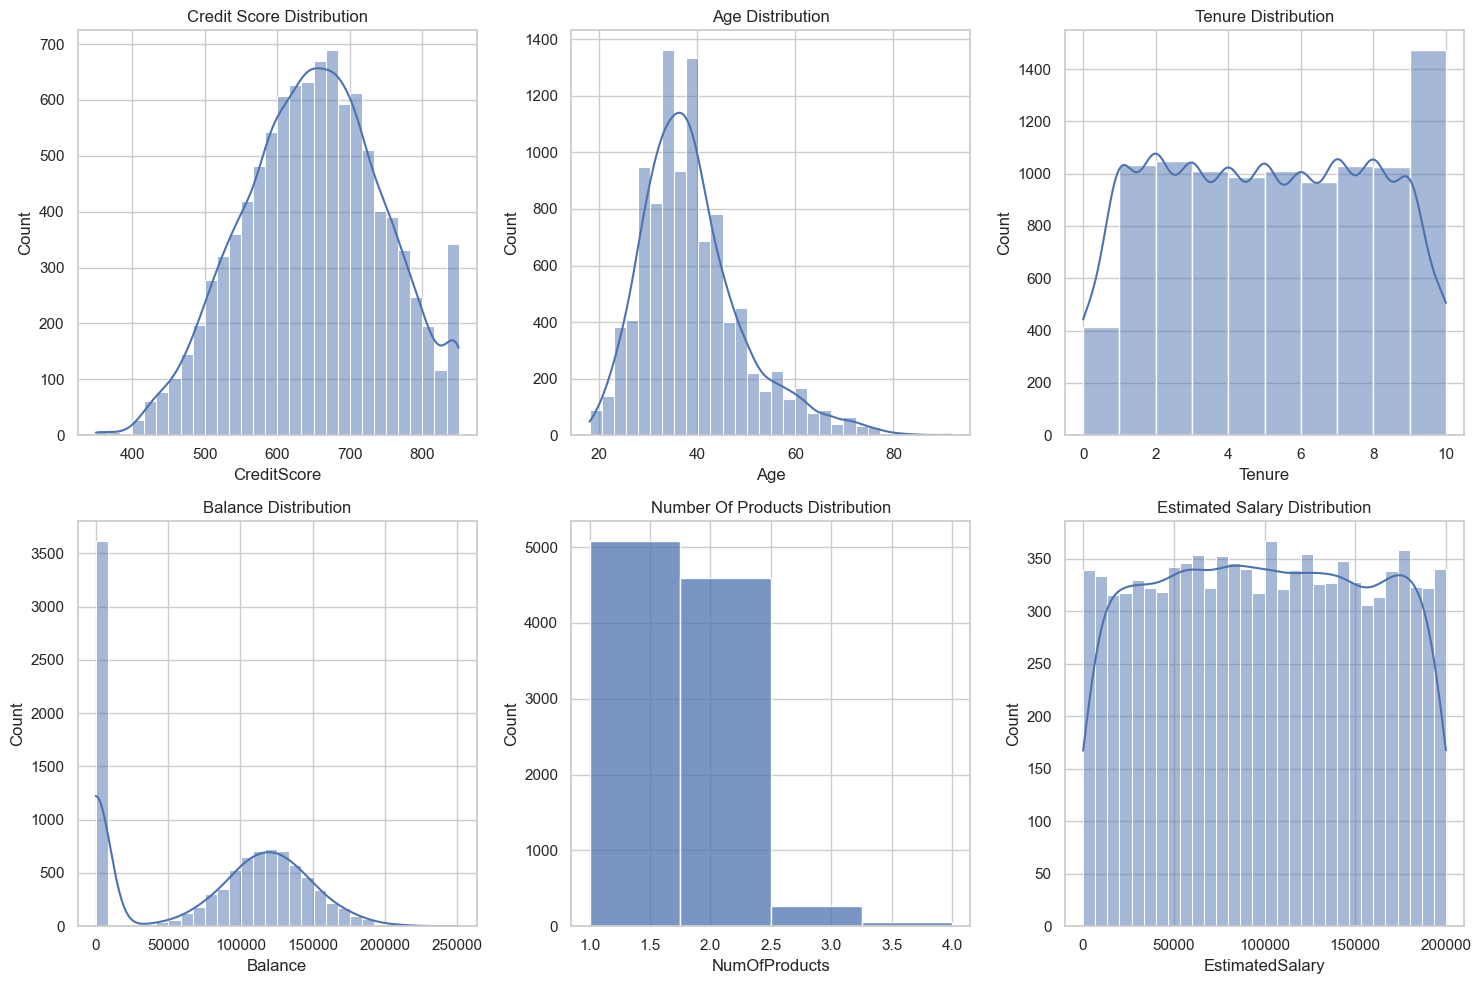

In [35]:


# Setting up the visualisation settings
sns.set(style="whitegrid")

# Creating subplots for each distribution
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Credit Score Distribution
sns.histplot(churn_data['CreditScore'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Credit Score Distribution')

# Age Distribution
sns.histplot(churn_data['Age'], bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Age Distribution')

# Tenure Distribution
sns.histplot(churn_data['Tenure'], bins=10, ax=axes[0, 2], kde=True)
axes[0, 2].set_title('Tenure Distribution')

# Balance Distribution
sns.histplot(churn_data['Balance'], bins=30, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Balance Distribution')

# Number Of Products Distribution
sns.histplot(churn_data['NumOfProducts'], bins=4, ax=axes[1, 1])
axes[1, 1].set_title('Number Of Products Distribution')

# Estimated Salary Distribution
sns.histplot(churn_data['EstimatedSalary'], bins=30, ax=axes[1, 2], kde=True)
axes[1, 2].set_title('Estimated Salary Distribution')

plt.tight_layout()
plt.show()


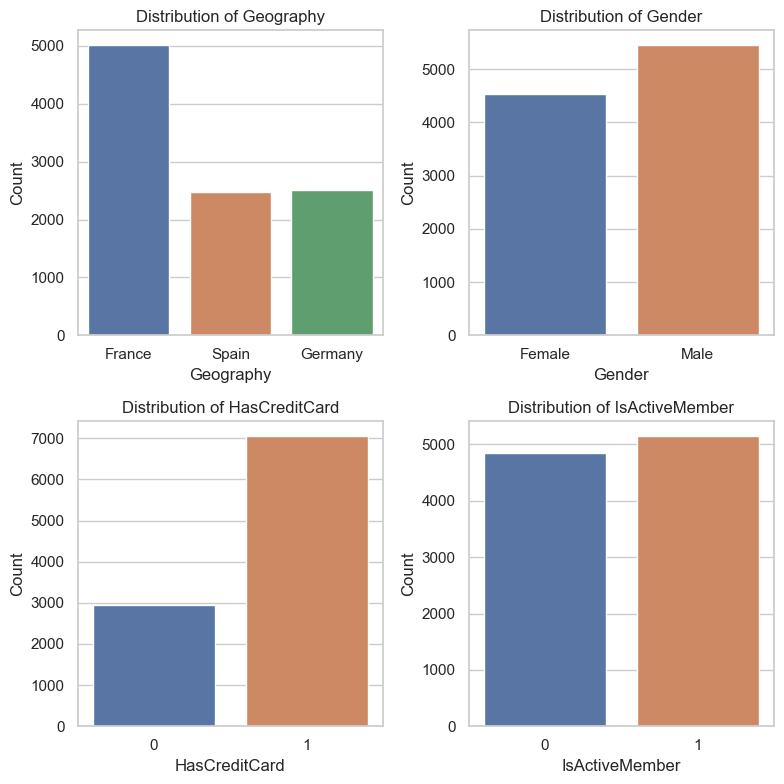

In [45]:
# Setting up the plotting style
sns.set(style="whitegrid")

# Selecting categorical columns for univariate analysis
categorical_columns = ['Geography', 'Gender', 'HasCreditCard', 'IsActiveMember']

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
axes = axes.flatten()  # Flattening the axes array for easy iteration

# Plotting each categorical column
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=churn_data, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

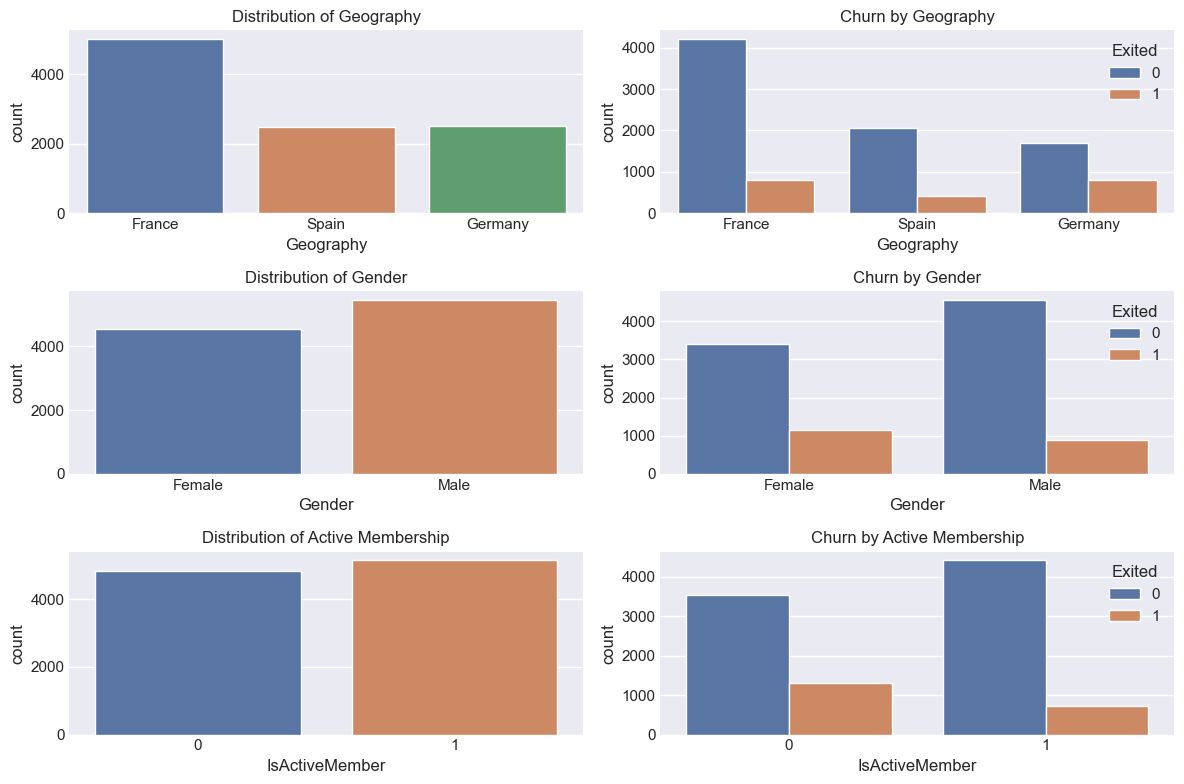

In [38]:
# Setting up the plot style
plt.style.use('seaborn-darkgrid')

# Plotting the distribution of categorical variables and their relationship with churn
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Geography
sns.countplot(ax=axes[0, 0], x='Geography', data=churn_data)
axes[0, 0].set_title('Distribution of Geography')

sns.countplot(ax=axes[0, 1], x='Geography', hue='Exited', data=churn_data)
axes[0, 1].set_title('Churn by Geography')

# Gender
sns.countplot(ax=axes[1, 0], x='Gender', data=churn_data)
axes[1, 0].set_title('Distribution of Gender')

sns.countplot(ax=axes[1, 1], x='Gender', hue='Exited', data=churn_data)
axes[1, 1].set_title('Churn by Gender')

# IsActiveMember
sns.countplot(ax=axes[2, 0], x='IsActiveMember', data=churn_data)
axes[2, 0].set_title('Distribution of Active Membership')

sns.countplot(ax=axes[2, 1], x='IsActiveMember', hue='Exited', data=churn_data)
axes[2, 1].set_title('Churn by Active Membership')

plt.tight_layout()
plt.show()


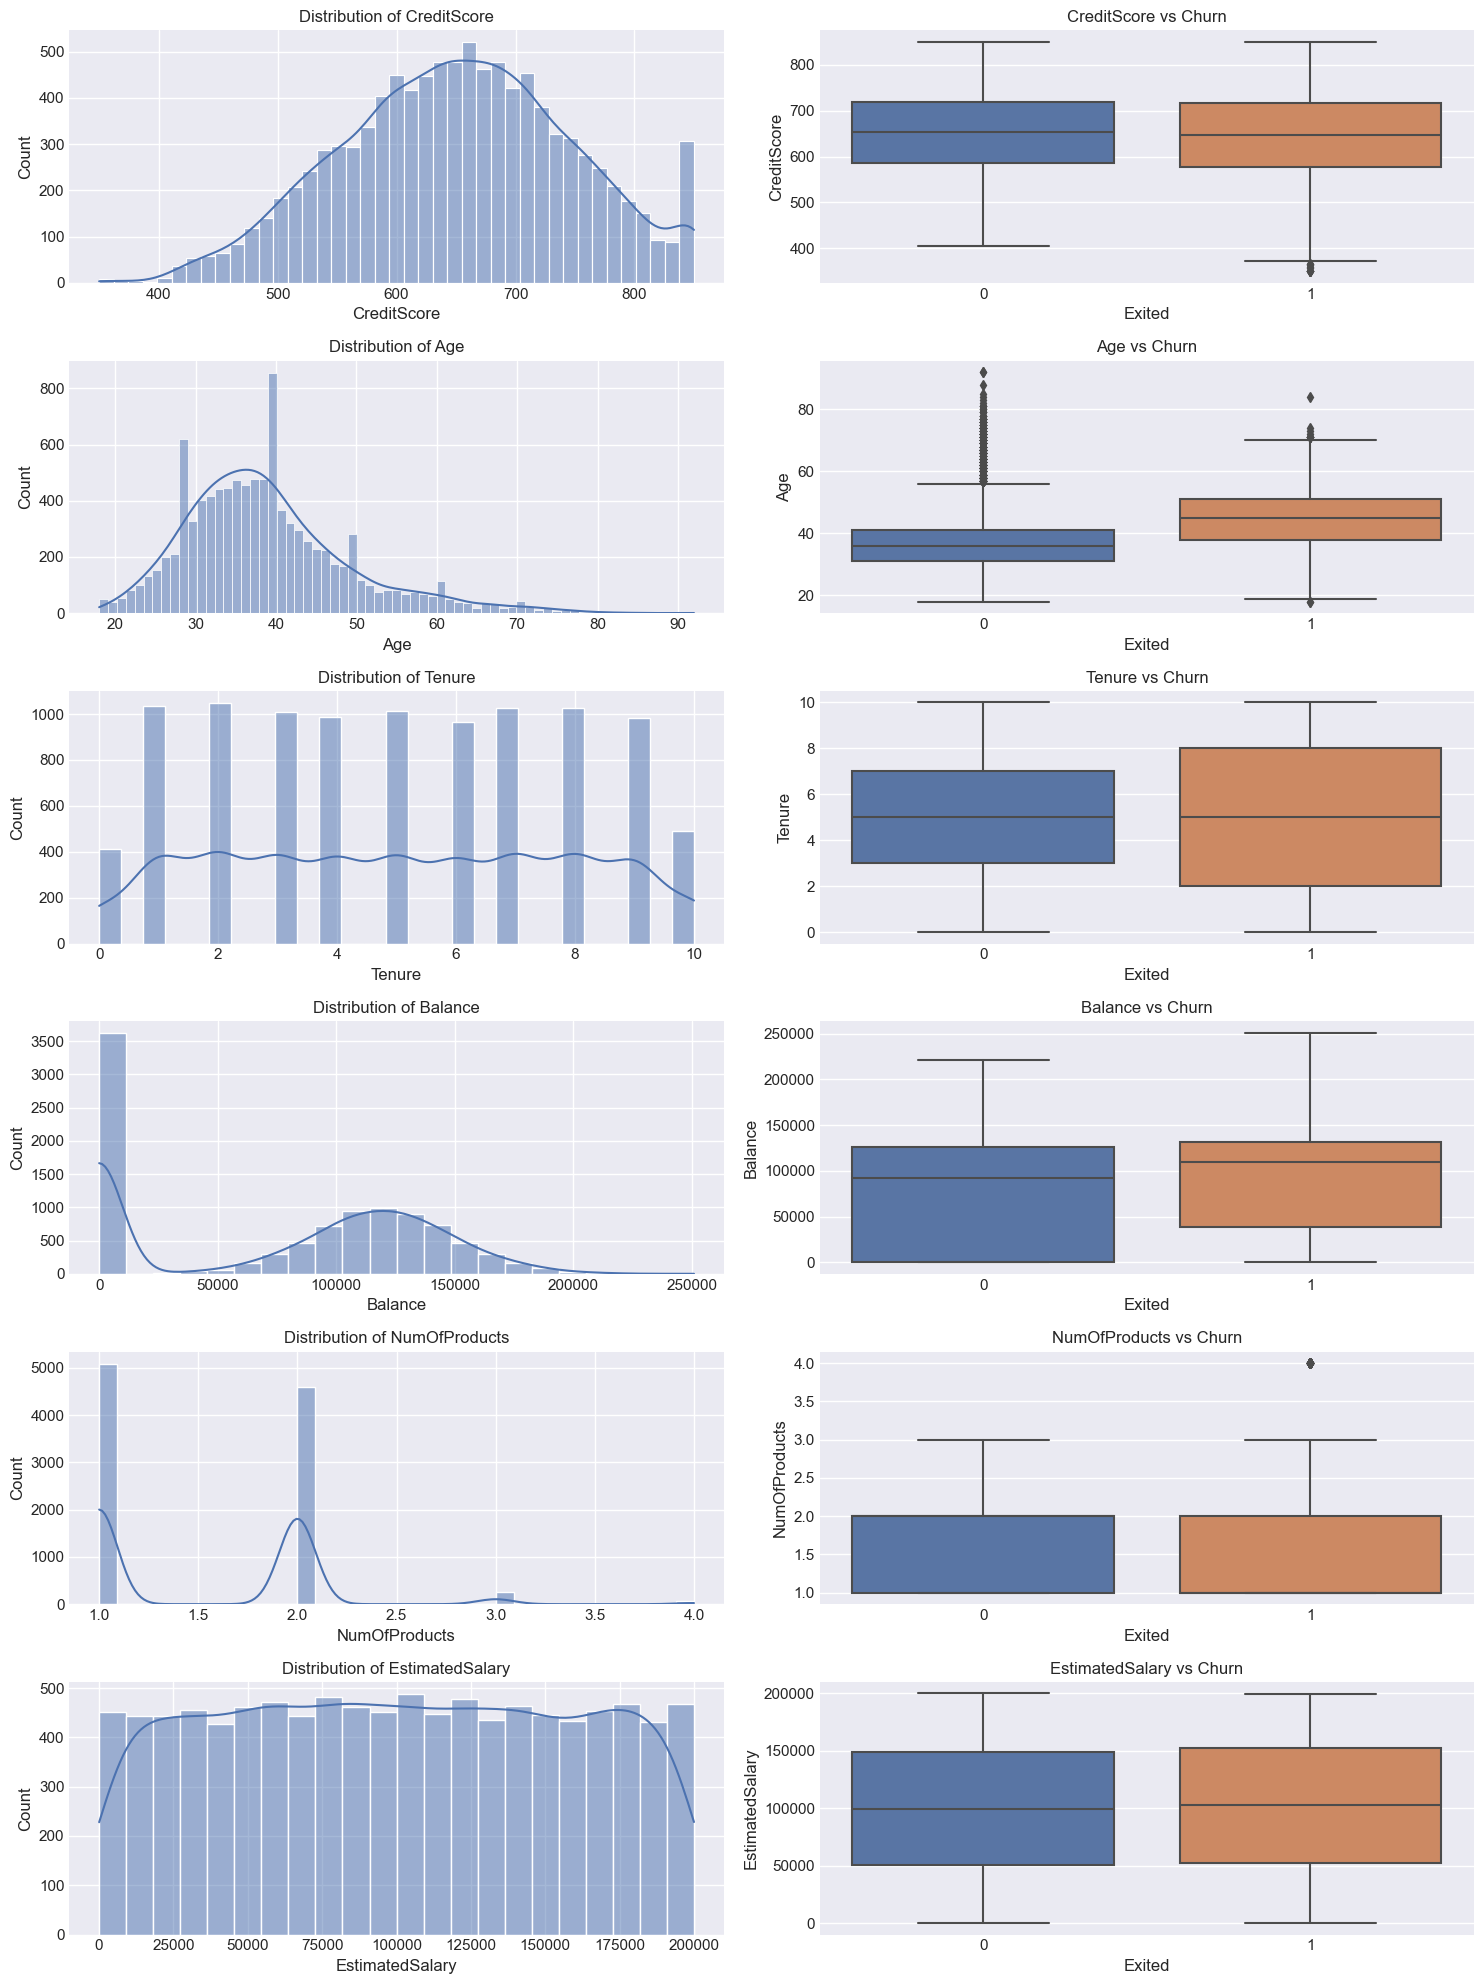

In [42]:
# Visualizing the distributions of numerical variables and their relationship with churn

# Selecting numerical columns for analysis
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(15, 20))

for i, col in enumerate(numerical_columns):
    # Histogram for distribution
    sns.histplot(churn_data[col], kde=True, ax=axes[i][0])
    axes[i][0].set_title(f'Distribution of {col}')
    
    # Boxplot to see relationship with churn
    sns.boxplot(x='Exited', y=col, data=churn_data, ax=axes[i][1])
    axes[i][1].set_title(f'{col} vs Churn')

plt.tight_layout()
plt.show()


C:\Users\Alina\AppData\Local\Temp\ipykernel_22396\1437736679.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AgeGroup', y='ChurnRate', hue='Gender', data=melted_data, ci=None)


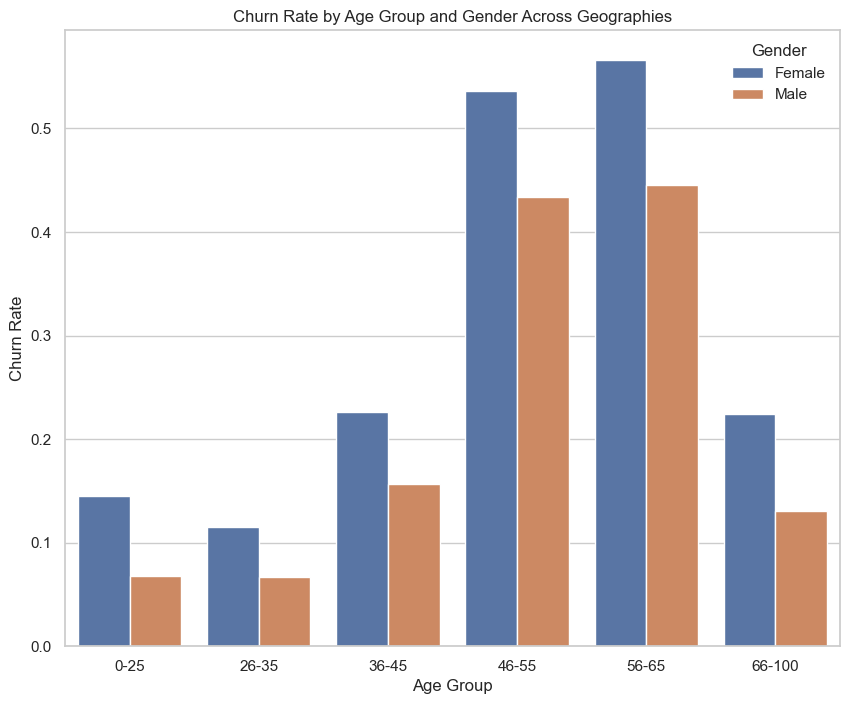

In [49]:
# Creating a bar plot for churn rate by Age Group and Gender across different geographies

# Creating age groups for segmentation
age_bins = [0, 25, 35, 45, 55, 65, 100]
age_labels = ['0-25', '26-35', '36-45', '46-55', '56-65', '66-100']
churn_data['AgeGroup'] = pd.cut(churn_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Re-creating the pivot table since the previous execution state is reset
pivot_table = churn_data.pivot_table(values='Exited', index=['AgeGroup', 'Gender'], columns='Geography', aggfunc='mean')

# Melting the pivot table to create a suitable DataFrame for a bar plot
melted_data = pivot_table.reset_index().melt(id_vars=['AgeGroup', 'Gender'], var_name='Geography', value_name='ChurnRate')

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='AgeGroup', y='ChurnRate', hue='Gender', data=melted_data, ci=None)
plt.title('Churn Rate by Age Group and Gender Across Geographies')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.legend(title='Gender')
plt.show()


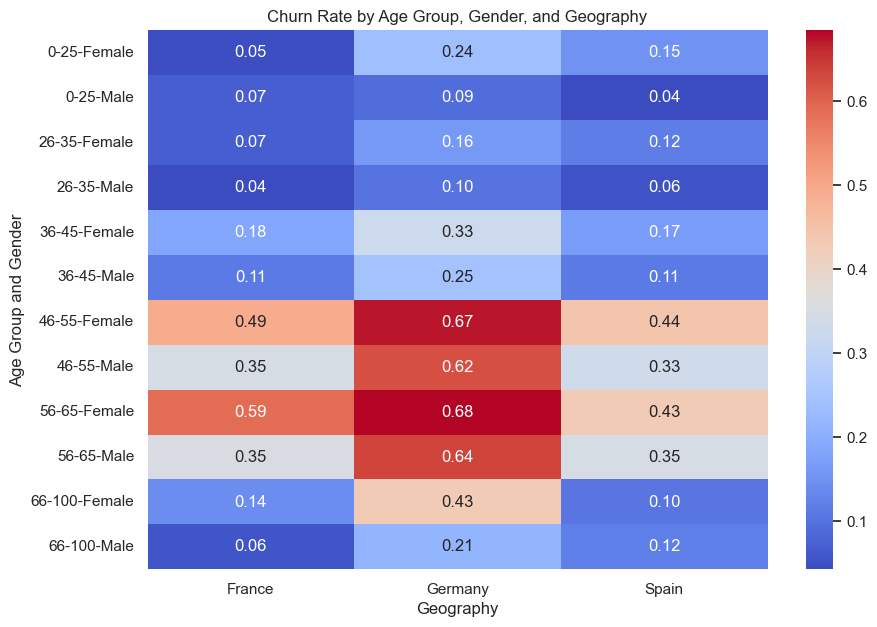

Geography          France   Germany     Spain
AgeGroup Gender                              
0-25     Female  0.046729  0.238095  0.150943
         Male    0.069231  0.092593  0.042857
26-35    Female  0.068421  0.161194  0.116564
         Male    0.042620  0.101737  0.055046
36-45    Female  0.183882  0.327549  0.167832
         Male    0.112431  0.245247  0.111864
46-55    Female  0.493590  0.672340  0.443182
         Male    0.346821  0.622120  0.331395
56-65    Female  0.587786  0.684783  0.426667
         Male    0.353333  0.635135  0.346154
66-100   Female  0.140845  0.428571  0.103448
         Male    0.057143  0.214286  0.119048

In [52]:
# Age Segmentation
# Creating age groups for segmentation
age_bins = [0, 25, 35, 45, 55, 65, 100]
age_labels = ['0-25', '26-35', '36-45', '46-55', '56-65', '66-100']
churn_data['AgeGroup'] = pd.cut(churn_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Analyzing the Churn Rate within each demographic segment
# Pivot table to analyze churn rate by Age Group, Gender, and Geography
pivot_table = churn_data.pivot_table(values='Exited', index=['AgeGroup', 'Gender'], columns='Geography', aggfunc='mean')

# Visualizing the Churn Rate within each demographic segment
plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Churn Rate by Age Group, Gender, and Geography')
plt.xlabel('Geography')
plt.ylabel('Age Group and Gender')
plt.show()

pivot_table

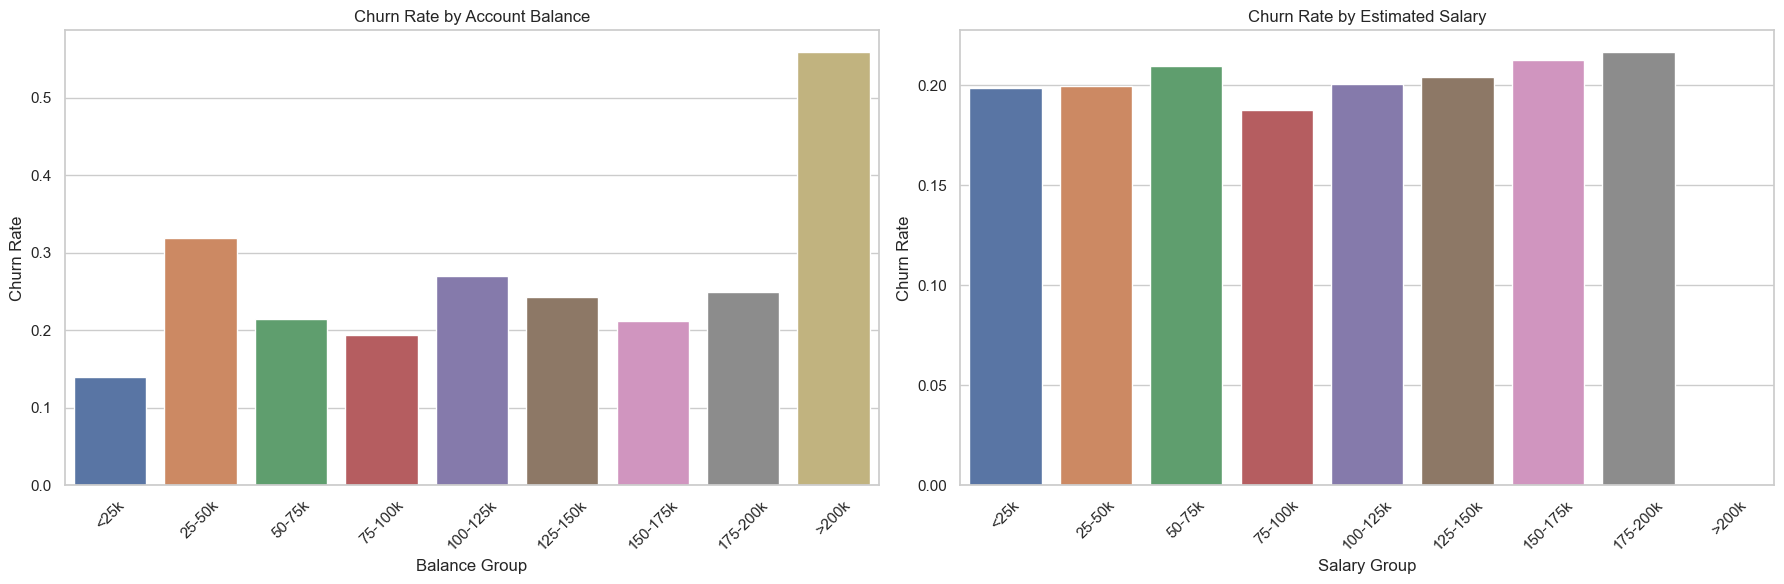

(  BalanceGroup    Exited
 0         <25k  0.139073
 1       25-50k  0.318841
 2       50-75k  0.214900
 3      75-100k  0.193966
 4     100-125k  0.269826
 5     125-150k  0.243335
 6     150-175k  0.211382
 7     175-200k  0.248731
 8        >200k  0.558824,
   SalaryGroup    Exited
 0        <25k  0.198850
 1      25-50k  0.199677
 2      50-75k  0.209614
 3     75-100k  0.187549
 4    100-125k  0.200627
 5    125-150k  0.204066
 6    150-175k  0.212552
 7    175-200k  0.216667
 8       >200k       NaN)

In [57]:
# Value-Based Segmentation based on Account Balance and Estimated Salary

# Creating balance segments
balance_bins = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, float('inf')]
balance_labels = ['<25k', '25-50k', '50-75k', '75-100k', '100-125k', '125-150k', '150-175k', '175-200k', '>200k']
churn_data['BalanceGroup'] = pd.cut(churn_data['Balance'], bins=balance_bins, labels=balance_labels, right=False)

# Creating salary segments
salary_bins = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, float('inf')]
salary_labels = ['<25k', '25-50k', '50-75k', '75-100k', '100-125k', '125-150k', '150-175k', '175-200k', '>200k']
churn_data['SalaryGroup'] = pd.cut(churn_data['EstimatedSalary'], bins=salary_bins, labels=salary_labels, right=False)

# Analyzing churn rates in balance segments
balance_churn = churn_data.groupby('BalanceGroup')['Exited'].mean().reset_index()

# Analyzing churn rates in salary segments
salary_churn = churn_data.groupby('SalaryGroup')['Exited'].mean().reset_index()

# Plotting churn rates for balance and salary segments
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Balance Segments
sns.barplot(x='BalanceGroup', y='Exited', data=balance_churn, ax=axes[0])
axes[0].set_title('Churn Rate by Account Balance')
axes[0].set_xlabel('Balance Group')
axes[0].set_ylabel('Churn Rate')
axes[0].tick_params(axis='x', rotation=45)

# Salary Segments
sns.barplot(x='SalaryGroup', y='Exited', data=salary_churn, ax=axes[1])
axes[1].set_title('Churn Rate by Estimated Salary')
axes[1].set_xlabel('Salary Group')
axes[1].set_ylabel('Churn Rate')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

balance_churn, salary_churn
